In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns= 82
pd.options.display.max_rows=82

# Data cleaning

In [2]:
df_tr = pd.read_csv('house-prices.csv')
print(df_tr.shape)
df_tr.head()

(2430, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [3]:
df_te = pd.read_csv('house-prices-test.csv')
print(df_te.shape)
df_te.head()

(500, 81)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,NaN,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.0,TA,TA,CBlock,TA,TA,Mn,Rec,297.0,LwQ,557.0,0.0,854.0,GasA,TA,Y,SBrkr,1096,895,0,1991,0.0,0.0,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.0,Unf,2.0,432.0,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.0,9757,Pave,NaN,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,TA,TA,No,ALQ,755.0,Unf,0.0,235.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1995.0,RFn,1.0,440.0,TA,TA,Y,66,0,0,0,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1085.0,1085.0,GasA,Ex,Y,SBrkr,1120,850,0,1970,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3.0,753.0,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,45.0,TA,TA,CBlock,TA,TA,No,Rec,588.0,Unf,0.0,422.0,1010.0,GasA,Ex,Y,SBrkr,1134,0,0,1134,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1960.0,RFn,1.0,254.0,TA,TA,Y,0,16,0,0,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Stone,TA,TA,Mn,Unf,0.0,Unf,0.0,859.0,859.0,GasA,Gd,Y,SBrkr,859,319,0,1178,0.0,0.0,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1964.0,RFn,1.0,384.0,TA,TA,N,68,0,98,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


In [4]:
# Concatenate training and test for clean up
df_te['SalePrice'] = np.NaN
df = pd.concat([df_tr, df_te], ignore_index=True)
df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,235,905378040,50,RL,124.0,18600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,3,4,1938,1990,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Mn,BLQ,288.0,LwQ,684.0,0.0,972.0,GasA,TA,Y,FuseA,1052,558,0,1610,0.0,1.0,2,0,4,1,Fa,8,Typ,1,Gd,Attchd,1938.0,RFn,1.0,480.0,TA,TA,Y,0,0,60,0,0,0,NaN,NaN,Shed,450,6,2010,WD,Normal,NaN
2926,2518,533252020,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,TA,CBlock,Gd,TA,No,ALQ,767.0,Unf,0.0,441.0,1208.0,GasA,TA,Y,SBrkr,1208,0,0,1208,1.0,0.0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2.0,546.0,TA,TA,Y,198,42,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2927,350,527127100,120,RL,28.0,7296,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1965.0,Unf,0.0,243.0,2208.0,GasA,Ex,Y,SBrkr,2522,0,0,2522,1.0,0.0,2,0,1,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,2.0,564.0,TA,TA,Y,182,57,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,NaN
2928,821,906340120,20,RL,61.0,10226,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,Stone,270.0,Gd,TA,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1622.0,1622.0,GasA,Ex,Y,SBrkr,1630,0,0,1630,1.0,0.0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2008.0,RFn,3.0,860.0,TA,TA,Y,172,42,0,0,0,0,NaN,NaN,NaN,0,1,2009,WD,Normal,NaN
2929,2005,902427180,80,RM,76.0,11800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,SLvl,4,7,1949,2002,Gable,CompShg,Stucco,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1382,0,0,1382,0.0,0.0,2,0,1,1,TA,6,Mod,1,TA,Attchd,1957.0,RFn,1.0,384.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,NaN


## General overview of the data

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
# columns with nominal values (23 + PID)
nominal_cols = [
    'PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour',
    'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
    'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
    'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

# columns with ordinal values (23)
ordinal_cols = [
    'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual',
    'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
    'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish',
    'Garage Qual', 'Garage Cond', 'Paved Drive','Pool QC', 'Fence']

# columns with discrete values (14 + Order)
discrete_cols = [
    'Order', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
    'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
    'Garage Cars', 'Mo Sold', 'Yr Sold']

# Continuous cols (20 including SalePrice)
continuous_cols = [
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
    'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area',
    'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area',
    'Misc Val','SalePrice']

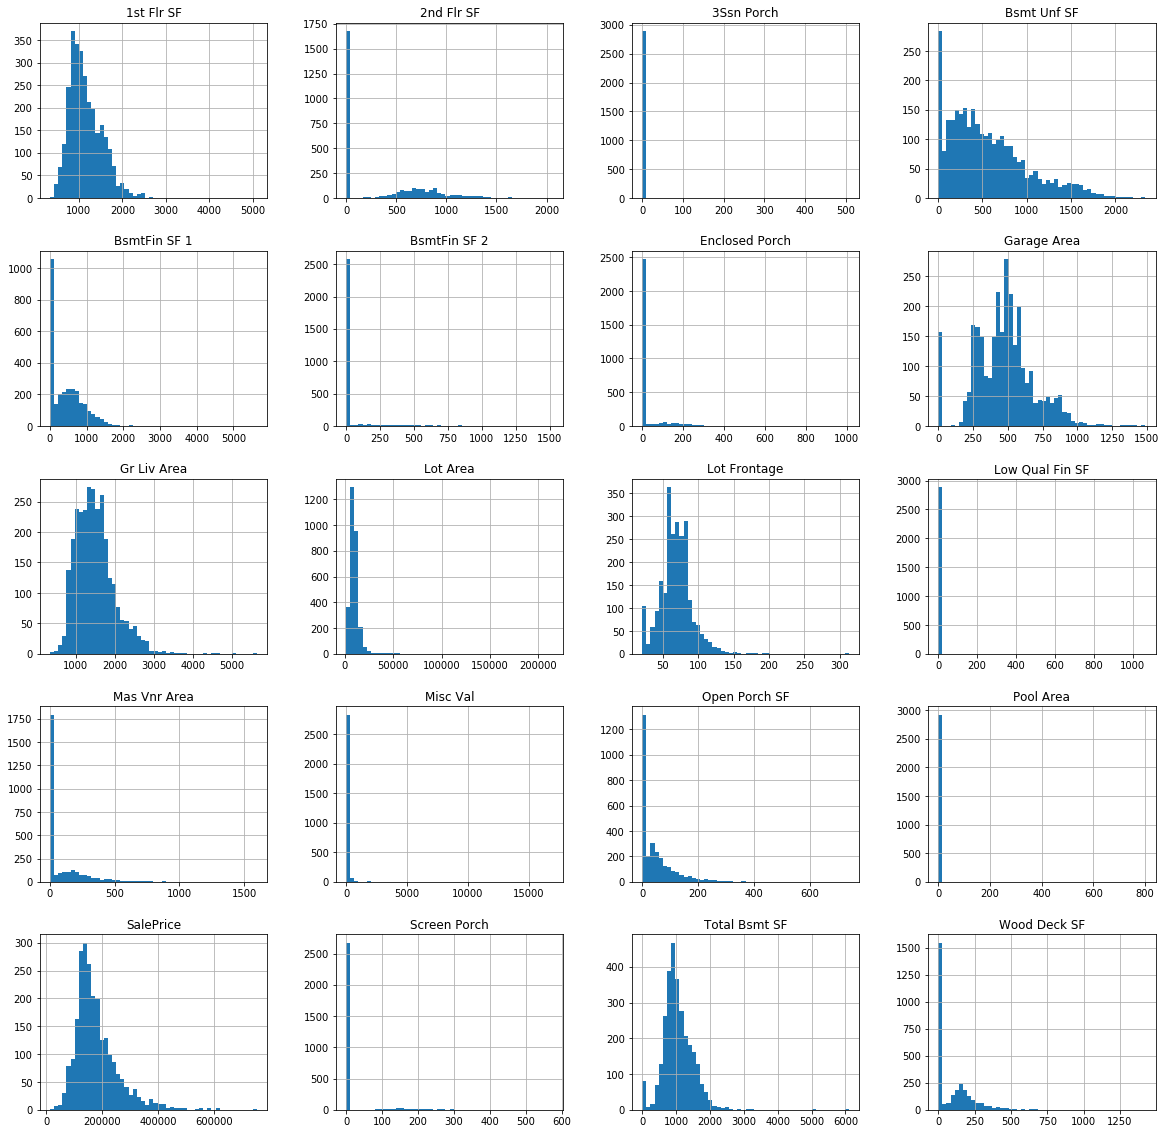

In [7]:
df[continuous_cols].hist(figsize=(20, 20), bins=50)
plt.show()

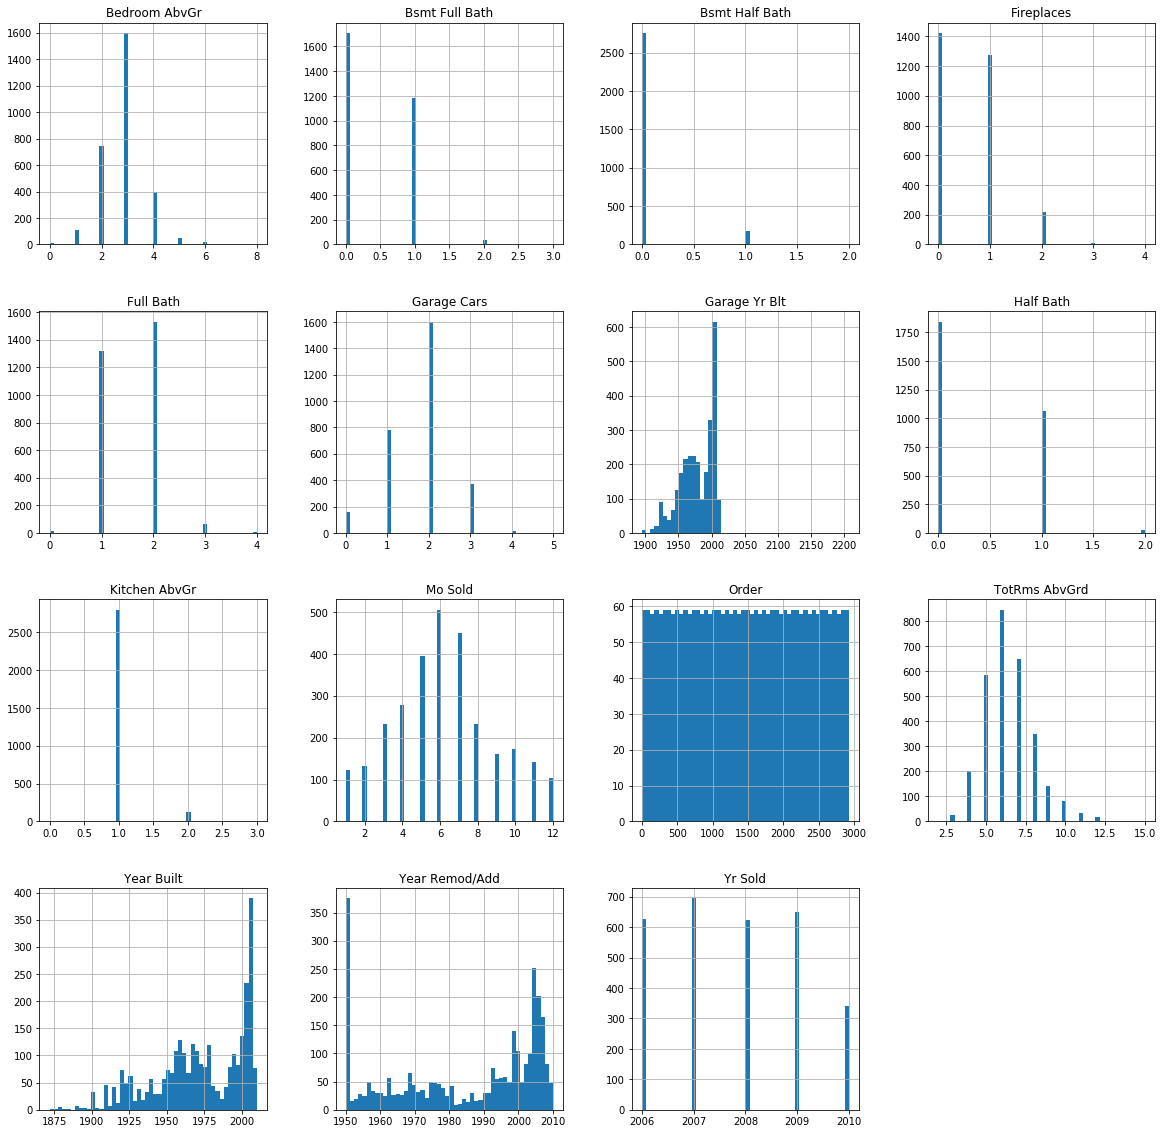

In [8]:
df[discrete_cols].hist(figsize=(20, 20), bins=50)
plt.show()

In [9]:
df[nominal_cols].isna().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Street               0
Alley             2732
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Foundation           0
Heating              0
Central Air          0
Garage Type        157
Misc Feature      2824
Sale Type            0
Sale Condition       0
dtype: int64

In [10]:
df[nominal_cols].dtypes

PID                int64
MS SubClass        int64
MS Zoning         object
Street            object
Alley             object
Land Contour      object
Lot Config        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Foundation        object
Heating           object
Central Air       object
Garage Type       object
Misc Feature      object
Sale Type         object
Sale Condition    object
dtype: object

In [11]:
df['MS SubClass'] = df['MS SubClass'].astype(str)
df[nominal_cols].dtypes

PID                int64
MS SubClass       object
MS Zoning         object
Street            object
Alley             object
Land Contour      object
Lot Config        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Foundation        object
Heating           object
Central Air       object
Garage Type       object
Misc Feature      object
Sale Type         object
Sale Condition    object
dtype: object

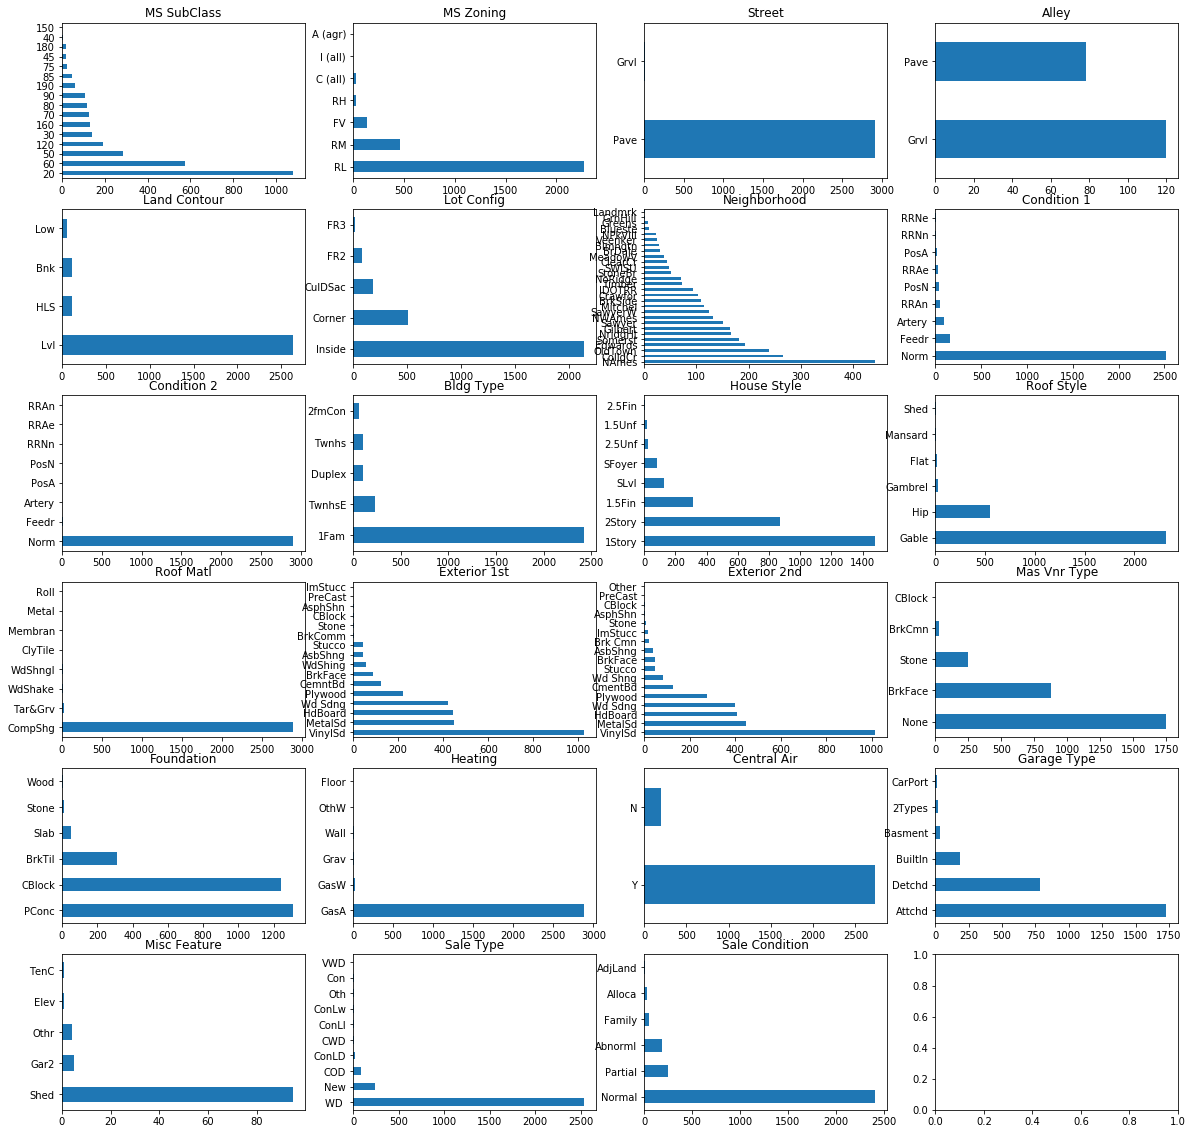

In [12]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for i, col in enumerate(nominal_cols[1:]):
    df[col].value_counts().plot(kind='barh', ax=axes[int(i/4), i%4], title=col)
plt.show()

In [13]:
df[ordinal_cols].dtypes

Lot Shape         object
Utilities         object
Land Slope        object
Overall Qual       int64
Overall Cond       int64
Exter Qual        object
Exter Cond        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating QC        object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object
dtype: object

In [14]:
df[ordinal_cols].isna().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Heating QC           0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1422
Garage Finish      159
Garage Qual        159
Garage Cond        159
Paved Drive          0
Pool QC           2917
Fence             2358
dtype: int64

In [15]:
df['Overall Qual'] = df['Overall Qual'].astype(str)
df['Overall Cond'] = df['Overall Cond'].astype(str)
df[ordinal_cols].dtypes

Lot Shape         object
Utilities         object
Land Slope        object
Overall Qual      object
Overall Cond      object
Exter Qual        object
Exter Cond        object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Heating QC        object
Electrical        object
Kitchen Qual      object
Functional        object
Fireplace Qu      object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Paved Drive       object
Pool QC           object
Fence             object
dtype: object

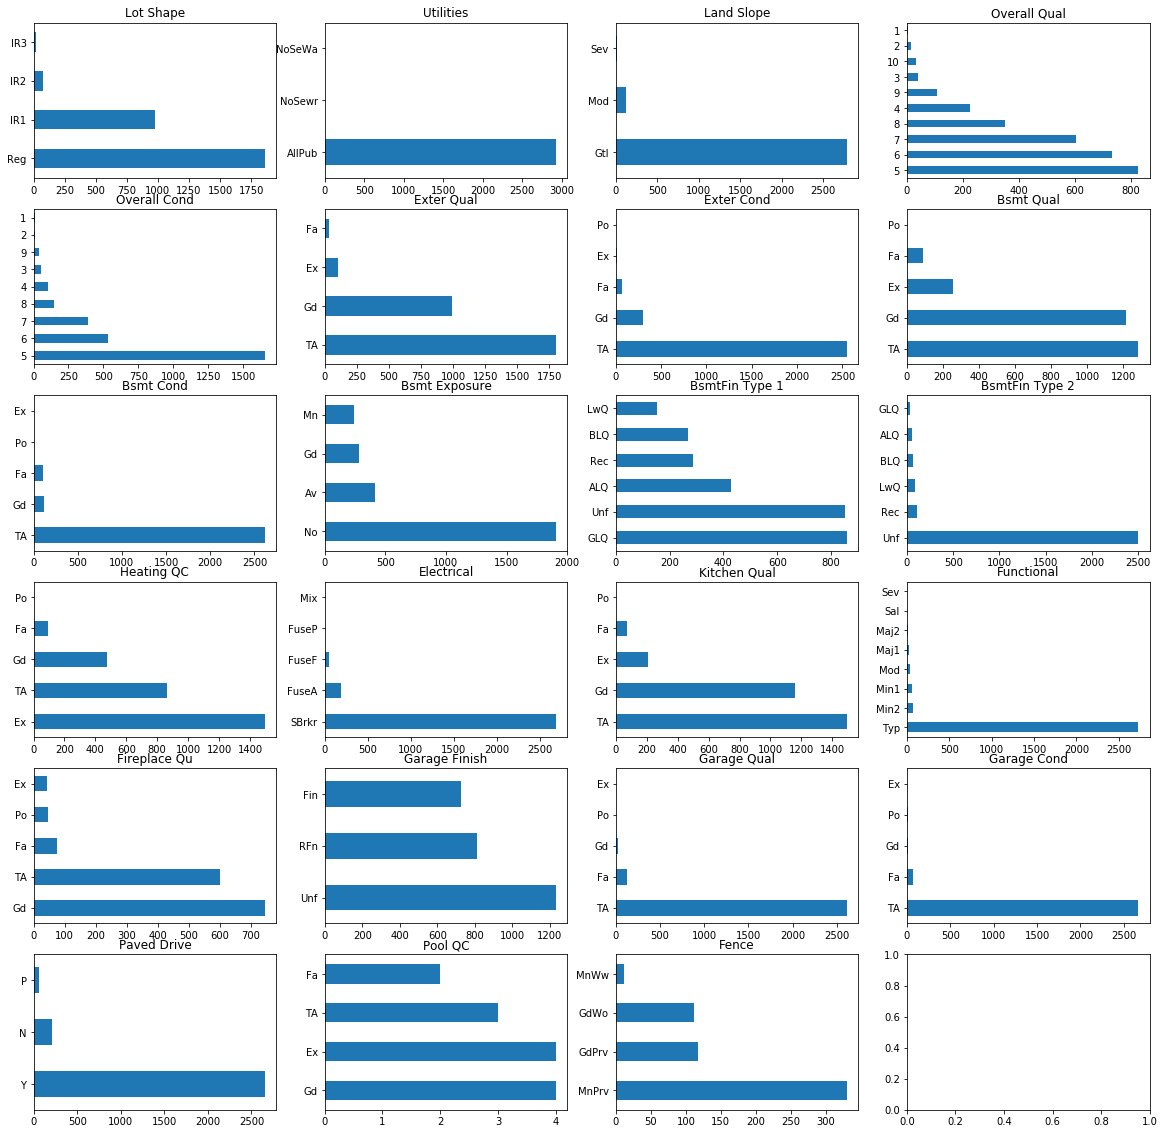

In [16]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for i, col in enumerate(ordinal_cols):
    df[col].value_counts().plot(kind='barh', ax=axes[int(i/4), i%4], title=col)
plt.show()

## Fix nominal columns

In [17]:
nominal_ser_na = df[nominal_cols].isna().sum()
nominal_ser_na[nominal_ser_na>0]

Alley           2732
Mas Vnr Type      23
Garage Type      157
Misc Feature    2824
dtype: int64

In [18]:
# All NaN are category NA except Mas Vnr Type where None category exists
ind_nominal_na = nominal_ser_na[nominal_ser_na > 0].index
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('Missing')
df[ind_nominal_na] = df[ind_nominal_na].fillna('NA')
df['Mas Vnr Type'] = df['Mas Vnr Type'].astype(str)

## Fix ordinal columns

In [19]:
ordinal_ser_na = df[ordinal_cols].isna().sum()
ordinal_ser_na[ordinal_ser_na > 0]

Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin Type 2      81
Electrical           1
Fireplace Qu      1422
Garage Finish      159
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
dtype: int64

In [20]:
# All NaN are category NA except Electrical
ind_ordinal_na = ordinal_ser_na[ordinal_ser_na > 0].index
df['Electrical'] = df['Electrical'].fillna('Missing')
df[ind_ordinal_na] = df[ind_ordinal_na].fillna('NA')
df[ind_ordinal_na] = df[ind_ordinal_na].astype(str)

## Fix discrete columns

In [21]:
discrete_ser_na = df[discrete_cols].isna().sum()
discrete_ser_na[discrete_ser_na > 0]

Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
dtype: int64

In [22]:
df[df['Bsmt Full Bath'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,Abnorml,79000.0
2056,1498,908154080,20,RL,123.0,47007,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NA,NA,NA,0,7,2008,WD,Normal,284700.0


In [23]:
# Assume number of basement baths equal number of baths
ind_bath_na = df[df['Bsmt Full Bath'].isna()].index
df.loc[ind_bath_na, 'Bsmt Full Bath'] = df.loc[ind_bath_na, 'Full Bath']
df.loc[ind_bath_na, 'Bsmt Half Bath'] = df.loc[ind_bath_na, 'Half Bath']

In [24]:
df[df['Garage Cars'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1565,2237,910201180,70,RM,50.0,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NA,NaN,NaN,NA,NA,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,Alloca,150909.0


In [25]:
# Assume there was no garage
ind_cars_na = df[df['Garage Cars'].isna()].index
df.loc[ind_cars_na, 'Garage Type'] = 'NA'
df.loc[ind_cars_na, 'Garage Cars'] = 0
df.loc[ind_cars_na, 'Garage Area'] = 0.0

In [26]:
# Check data for year built above 2010
df[df['Garage Yr Blt'] > 2010]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2219,2261,916384070,20,RL,68.0,8298,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Missing,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NA,NA,NA,0,9,2007,New,Partial,267300.0


In [27]:
# Assumed built at the same time of house
ind_garage = df[df['Garage Yr Blt'] > 2010].index
df.loc[ind_garage, 'Garage Yr Blt'] = df.loc[ind_garage, 'Year Built']

In [28]:
df[df['Year Built'] > df['Year Remod/Add']]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2612,851,907194160,20,RL,65.0,10739,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Gd,TA,PConc,Gd,TA,No,GLQ,1259.0,Unf,0.0,172.0,1431.0,GasA,Ex,Y,SBrkr,1444,0,0,1444,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,144,40,0,0,0,0,NA,NA,NA,0,4,2009,WD,Normal,NaN


In [29]:
# Assume year built = year remodeled
index = df[df['Year Built'] > df['Year Remod/Add']].index
df.loc[index, 'Year Built'] = df.loc[index, 'Year Remod/Add']

In [30]:
df[df['Full Bath'] < df['Bsmt Full Bath']][['Full Bath', 'Bsmt Full Bath']]

,Full Bath,Bsmt Full Bath
247,0,2.0
321,1,2.0
434,1,2.0
620,0,2.0
842,0,2.0
846,0,2.0
999,0,2.0
1349,1,2.0
1374,0,2.0
1465,0,2.0


In [31]:
# Assume full bath and Bsmt full bath have been swapped
ind_full_bath = df[df['Full Bath'] < df['Bsmt Full Bath']].index
full_bath_aux = df.loc[ind_full_bath, 'Full Bath'].copy()
df.loc[ind_full_bath, 'Full Bath'] = df.loc[ind_full_bath, 'Bsmt Full Bath']
df.loc[ind_full_bath, 'Bsmt Full Bath'] = full_bath_aux
df[df['Full Bath'] < df['Bsmt Full Bath']]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [32]:
df[df['Half Bath'] < df['Bsmt Half Bath']][['Half Bath', 'Bsmt Half Bath']]

,Half Bath,Bsmt Half Bath
31,0,1.0
39,0,1.0
112,0,1.0
160,0,1.0
161,0,1.0
183,0,1.0
196,0,1.0
198,0,1.0
218,0,1.0
273,0,1.0


In [33]:
# Assume half bath and Bsmt half bath have been swapped
ind_half_bath = df[df['Half Bath'] < df['Bsmt Half Bath']].index
half_bath_aux = df.loc[ind_half_bath, 'Half Bath'].copy()
df.loc[ind_half_bath, 'Half Bath'] = df.loc[ind_half_bath, 'Bsmt Half Bath']
df.loc[ind_half_bath, 'Bsmt Full Bath'] = half_bath_aux
df[df['Half Bath'] < df['Bsmt Half Bath']]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [34]:
df[df['Year Built'] > df['Garage Yr Blt']][['Year Built', 'Garage Yr Blt', 'Year Remod/Add']]

,Year Built,Garage Yr Blt,Year Remod/Add
140,1963,1962.0,1963
154,1935,1926.0,1950
330,1978,1960.0,1978
414,1927,1920.0,1950
476,1950,1949.0,1950
1029,1959,1954.0,1959
1281,1935,1920.0,1998
1316,1959,1956.0,1959
1464,2006,2005.0,2007
1474,2006,2005.0,2006


In [35]:
# Assume Year Built and Garage Yr Blt have been swaped
ind_year_built = df[df['Year Built'] > df['Garage Yr Blt']].index
year_built_aux = df.loc[ind_year_built, 'Year Built'].copy()
df.loc[ind_year_built, 'Year Built'] = df.loc[ind_year_built, 'Garage Yr Blt']
df.loc[ind_year_built, 'Garage Yr Blt'] = year_built_aux
df[df['Year Built'] > df['Garage Yr Blt']][['Year Built', 'Garage Yr Blt', 'Year Remod/Add']]

,Year Built,Garage Yr Blt,Year Remod/Add


In [36]:
# Arbitrary set NaN Garage Yr Blt (corresponding to No garage) to one year before first garage year built
df.loc[df['Garage Yr Blt'].isna(), 'Garage Yr Blt'] = df['Garage Yr Blt'].min()-1

In [37]:
# Check consistency of number of rooms
df[df['TotRms AbvGrd'] < (df['Bedroom AbvGr']+ df['Kitchen AbvGr'])]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [38]:
# Check consistency of garage data
df[
    (df['Garage Type'] == 'NA') & 
    ((df['Garage Finish'] != 'NA') | (df['Garage Cars'] != 0) |
     (df['Garage Area'] != 0) | (df['Garage Qual'] != 'NA') | (df['Garage Cond'] != 'NA'))]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


In [39]:
df[discrete_cols].dtypes

Order               int64
Year Built        float64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath         float64
Half Bath         float64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt     float64
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

In [40]:
df[discrete_cols] = df[discrete_cols].astype(int) 

In [41]:
df[discrete_cols].dtypes

Order             int64
Year Built        int64
Year Remod/Add    int64
Bsmt Full Bath    int64
Bsmt Half Bath    int64
Full Bath         int64
Half Bath         int64
Bedroom AbvGr     int64
Kitchen AbvGr     int64
TotRms AbvGrd     int64
Fireplaces        int64
Garage Yr Blt     int64
Garage Cars       int64
Mo Sold           int64
Yr Sold           int64
dtype: object

# Fix continuous columns

In [42]:
continuous_ser_na = df[continuous_cols].isna().sum()
continuous_ser_na[continuous_ser_na > 0]

Lot Frontage     490
Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
SalePrice        500
dtype: int64

In [43]:
df[df['Total Bsmt SF'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,1342,903230120,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,1,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1,280.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,Abnorml,79000.0


In [44]:
# Remove the entry because there are too many incoherencies (e.g. No basement but bath in the basement)
df.drop(index=df[df['Total Bsmt SF'].isna()].index, inplace=True)

In [45]:
df[df['Mas Vnr Area'].isna()][['Mas Vnr Type', 'Mas Vnr Area']]

,Mas Vnr Type,Mas Vnr Area
66,Missing,NaN
83,Missing,NaN
101,Missing,NaN
159,Missing,NaN
201,Missing,NaN
270,Missing,NaN
352,Missing,NaN
447,Missing,NaN
456,Missing,NaN
457,Missing,NaN


In [46]:
# Seems fair to assume that Missing Mas Vnr Type corresponds to None
index = df[df['Mas Vnr Type'] == 'Missing'].index
df.loc[index, 'Mas Vnr Type'] = 'None'
df.loc[index, 'Mas Vnr Area'] = 0.

In [47]:
df[df['Lot Frontage'].isna()]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000,Fin,2,554.0,TA,TA,Y,224,54,0,0,0,0,NA,NA,NA,0,4,2009,WD,Normal,236000.0
13,785,905377130,30,RL,NaN,12342,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0,0,1,0,1,1,TA,4,Typ,0,NA,Detchd,1961,Unf,2,539.0,TA,TA,Y,158,0,0,0,0,0,NA,NA,NA,0,3,2009,WD,Normal,82500.0
26,583,534128010,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484.0,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000.0
34,1611,1007100110,70,I (all),NaN,56600,Pave,NA,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0,0,2,0,4,1,TA,7,Maj1,0,NA,Detchd,1900,Unf,1,288.0,TA,Fa,N,0,0,0,0,0,0,NA,NA,NA,0,1,2008,WD,Normal,103000.0
35,2893,916252170,120,RM,NaN,8239,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1986,RFn,1,312.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,11,2006,WD,Normal,230000.0
38,1755,528275110,60,RL,NaN,8740,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,574.0,Unf,0.0,280.0,854.0,GasA,Ex,Y,SBrkr,864,1131,0,1995,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002,Fin,2,435.0,TA,TA,Y,264,48,0,0,0,0,NA,NA,NA,0,7,2007,WD,Normal,219500.0
57,2789,907230240,160,RH,NaN,3612,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0,0,2,1,3,1,TA,5,Typ,0,NA,Detchd,1993,Unf,2,484.0,TA,TA,Y,0,48,0,0,0,0,NA,MnPrv,NA,0,6,2006,WD,Normal,137000.0
70,2511,533221080,160,FV,NaN,2998,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0,0,2,1,2,1,Gd,4,Typ,0,NA,Detchd,2000,Unf,2,440.0,TA,TA,Y,0,32,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,166000.0
78,1264,535426260,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733.0,Unf,0.0,520.0,1253.0,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960,RFn,1,352.0,TA,TA,Y,0,21

In [48]:
# Assume NaN Lot Frontage means not connected to street
df.loc[df[df['Lot Frontage'].isna()].index, 'Lot Frontage'] = 0.

In [49]:
# Remove houses with size above 4000 SF as recommended in the documentation
print(df.shape)
df.drop(index=df_tr[df_tr['Gr Liv Area']>4000.].index, inplace=True)
print(df.shape)

(2929, 82)
(2925, 82)


# Explore cleaned data

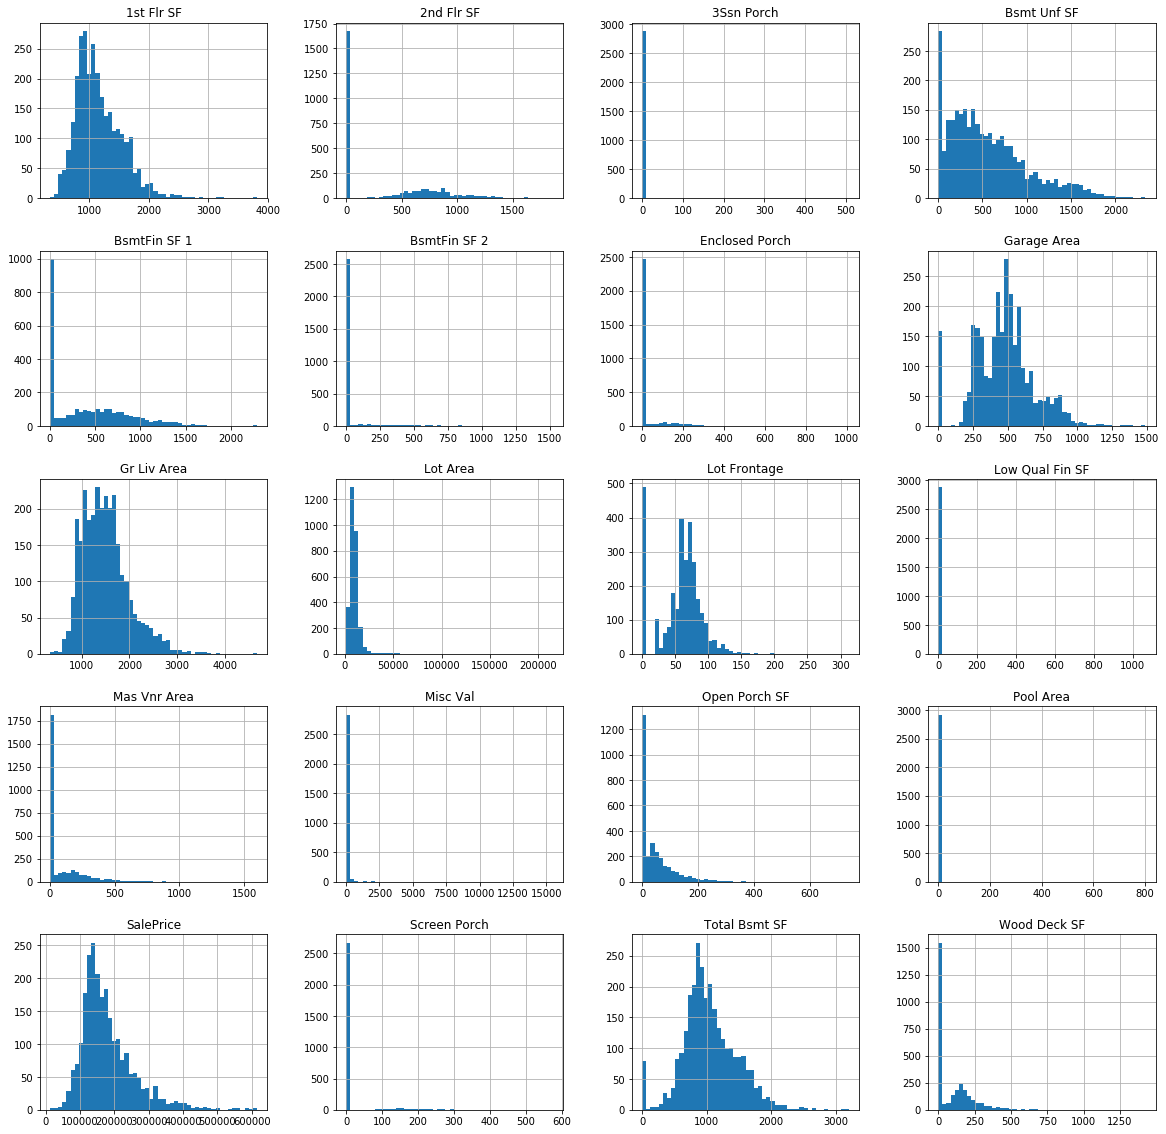

In [50]:
df[continuous_cols].hist(figsize=(20, 20), bins=50)
plt.show()

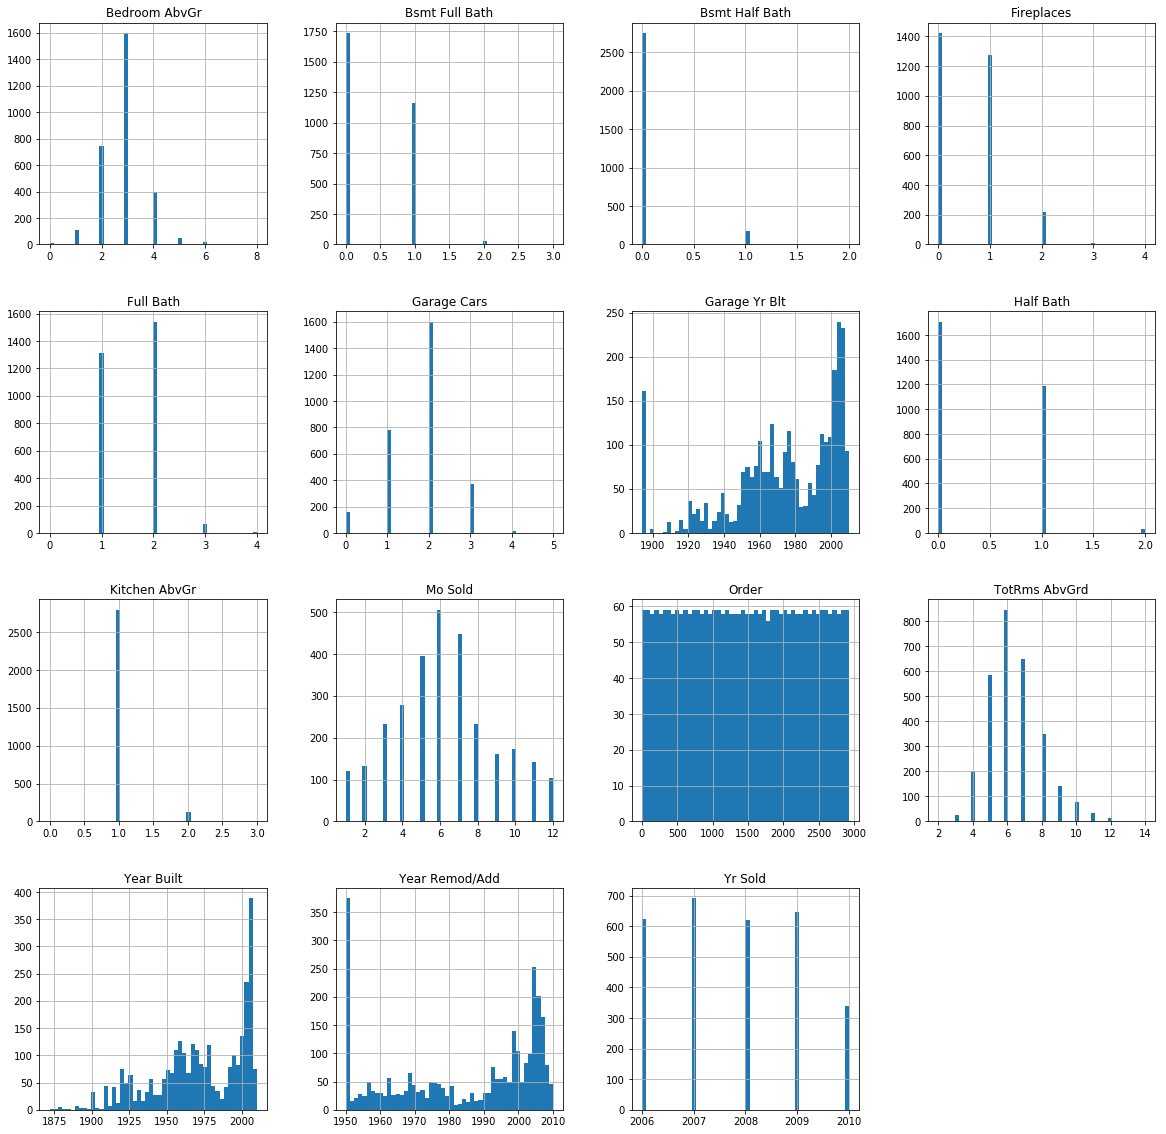

In [51]:
df[discrete_cols].hist(figsize=(20, 20), bins=50)
plt.show()

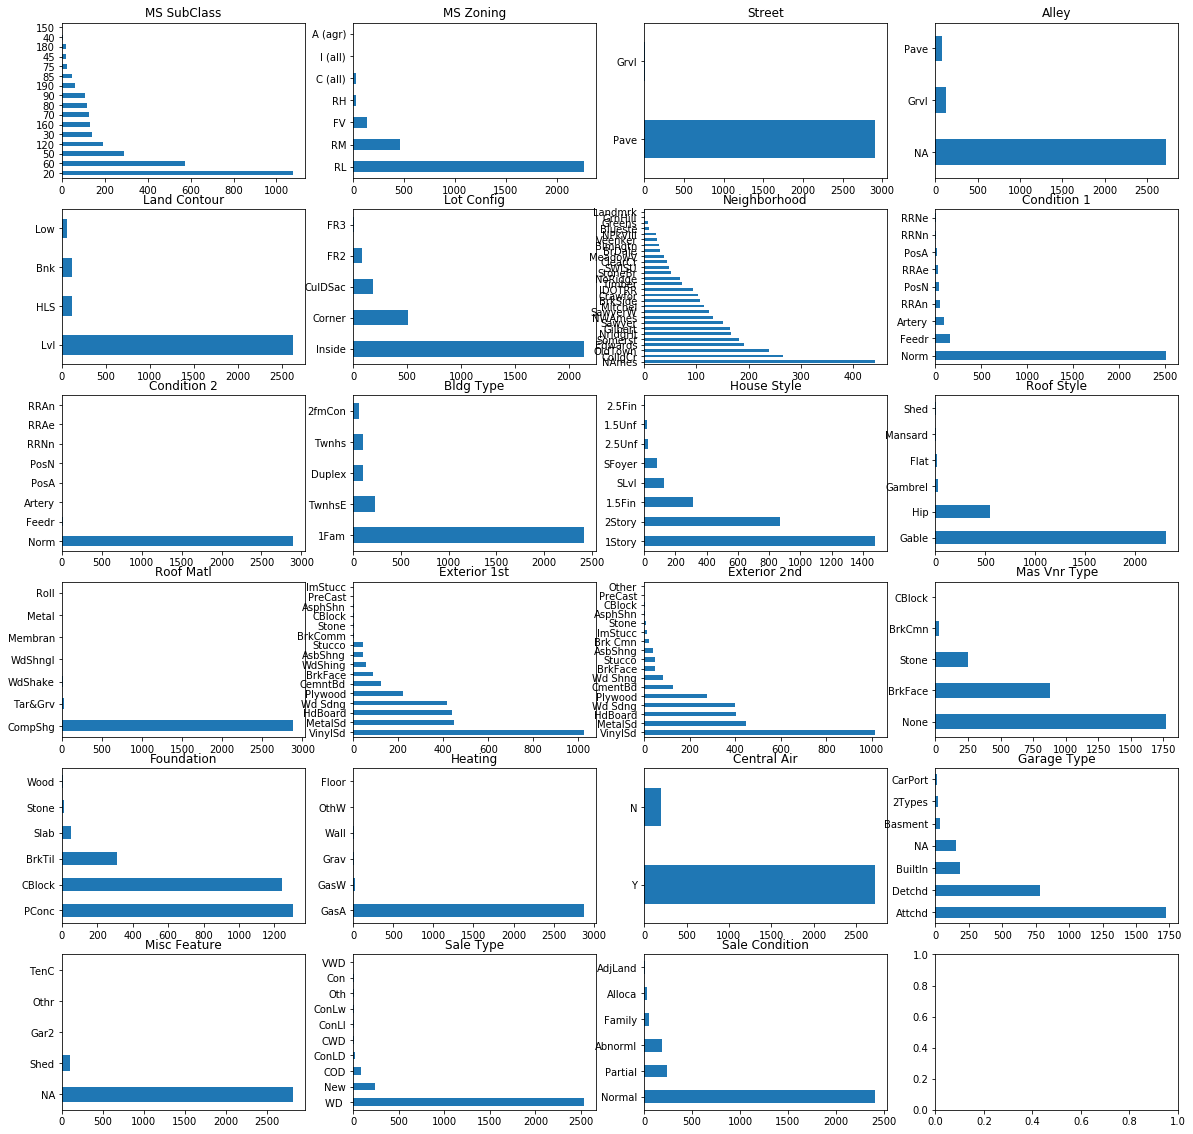

In [52]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for i, nc in enumerate(nominal_cols[1:]):
    df[nc].value_counts().plot(kind='barh', ax=axes[int(i/4), i%4], title=nc)
plt.show()

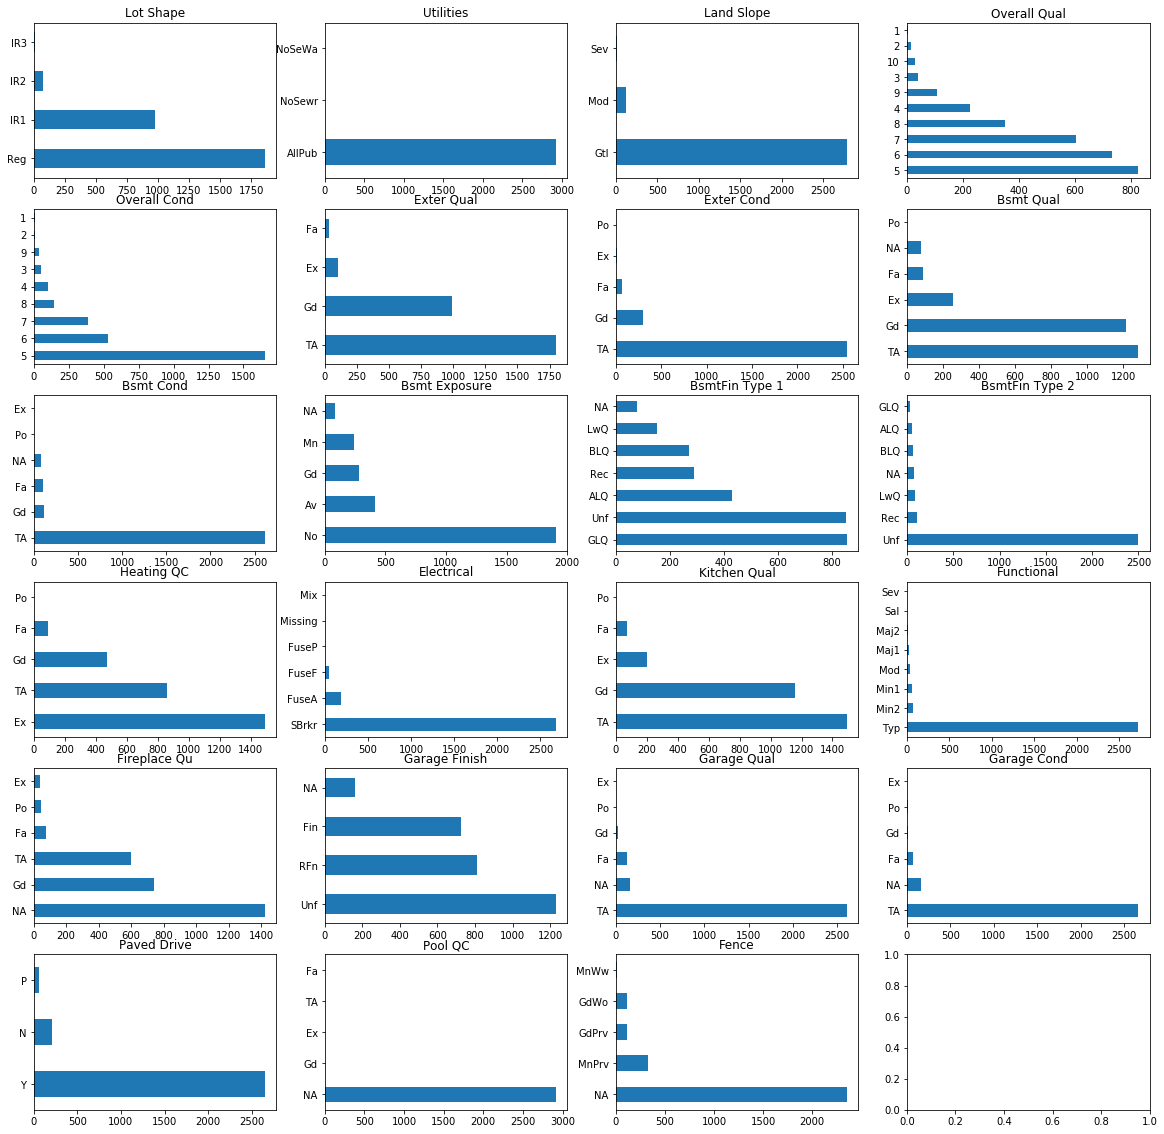

In [53]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for i, oc in enumerate(ordinal_cols):
    df[oc].value_counts().plot(kind='barh', ax=axes[int(i/4), i%4], title=oc)
plt.show()

# Relationship between feature and target

In [54]:
df_tr = df[~df['SalePrice'].isna()]
print(df_tr.shape)
df_tr.head()

(2425, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,0.0,8795,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000,Fin,2,554.0,TA,TA,Y,224,54,0,0,0,0,NA,NA,NA,0,4,2009,WD,Normal,236000.0
1,2586,535305120,20,RL,75.0,10170,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0,0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951,Unf,2,400.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,Normal,155000.0
2,2289,923228250,160,RM,21.0,2001,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1970,Unf,1,286.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,1,2007,WD,Normal,75000.0
3,142,535152150,20,RL,70.0,10552,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0,1,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959,RFn,2,447.0,TA,TA,Y,0,38,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,165500.0
4,2042,903475060,190,RM,60.0,10120,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0,0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960,Unf,1,308.0,TA,TA,N,0,0,264,0,0,0,NA,MnPrv,NA,0,1,2007,WD,Normal,122000.0


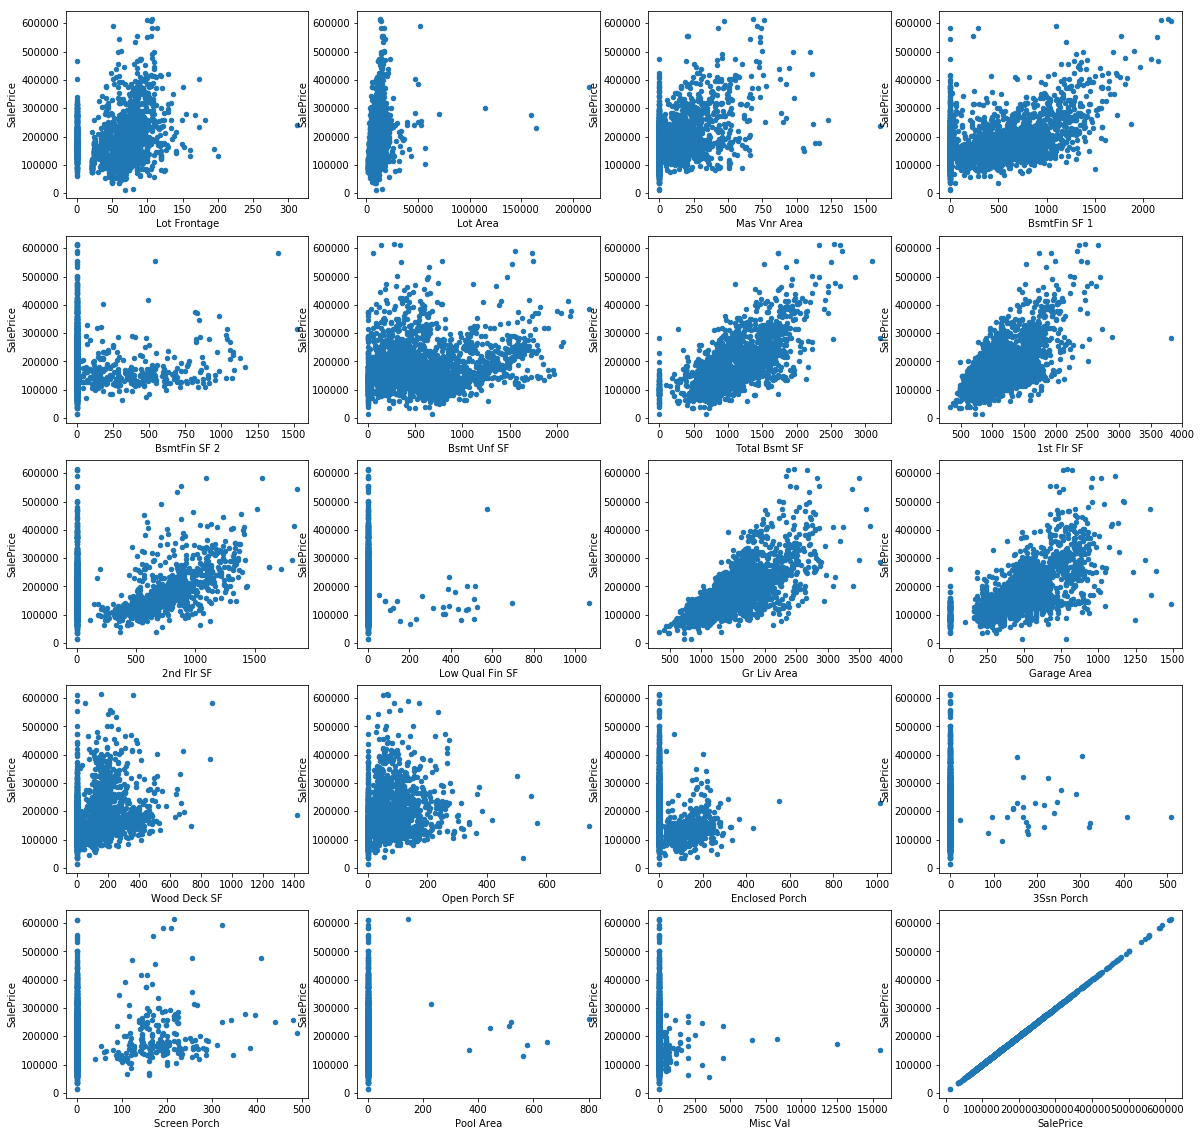

In [55]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
for i, cc in enumerate(continuous_cols):
    df_tr.plot.scatter(x=cc, y='SalePrice', ax=axes[int(i/4), i%4])
plt.show()

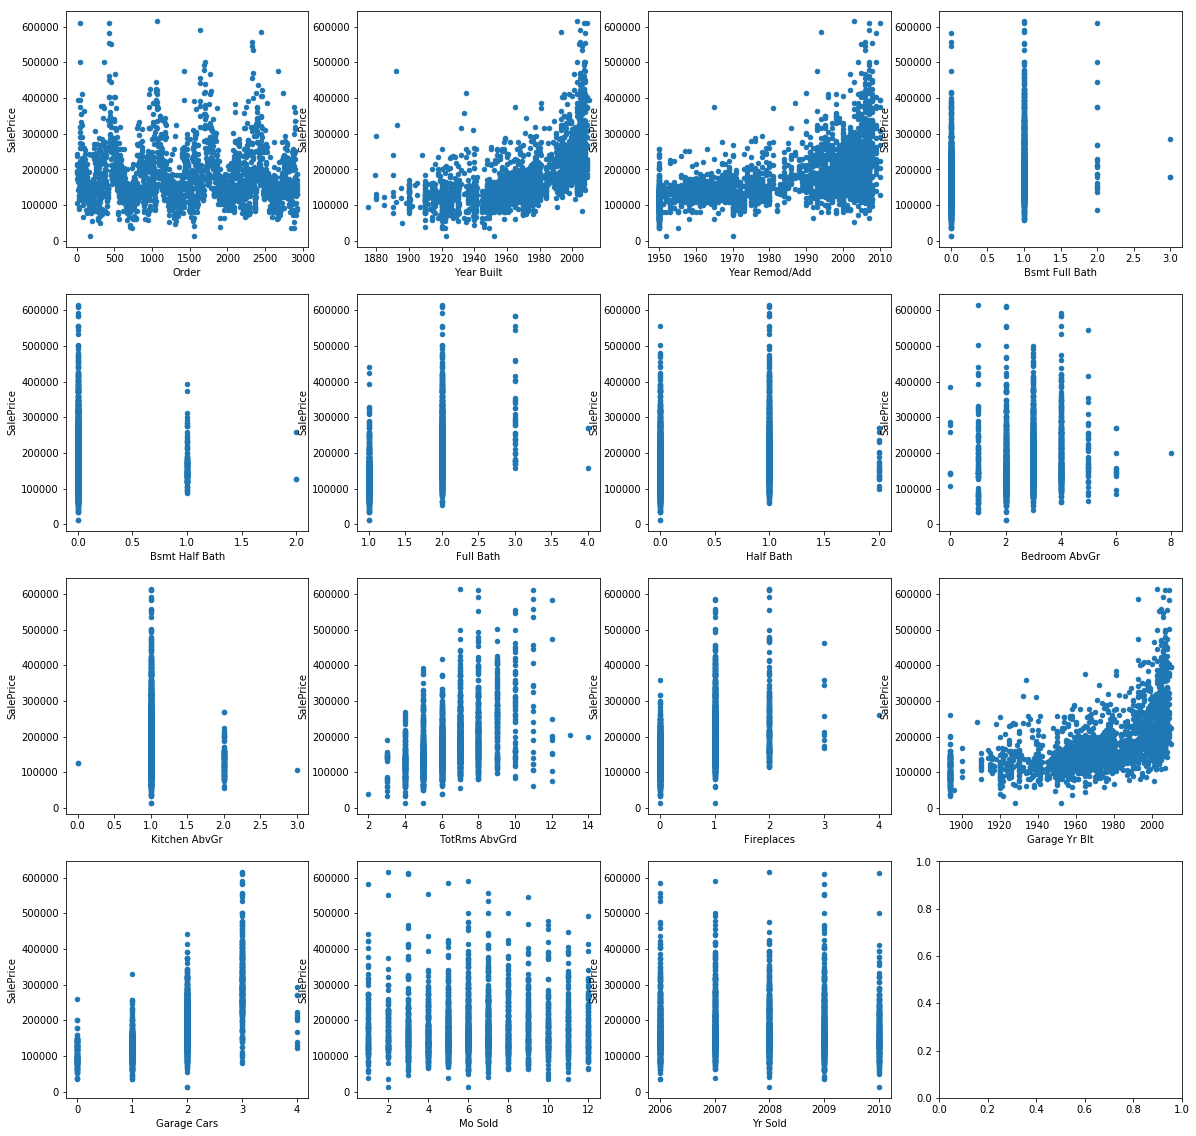

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
for i, dc in enumerate(discrete_cols):
    df_tr.plot.scatter(x=dc, y='SalePrice', ax=axes[int(i/4), i%4])
plt.show()

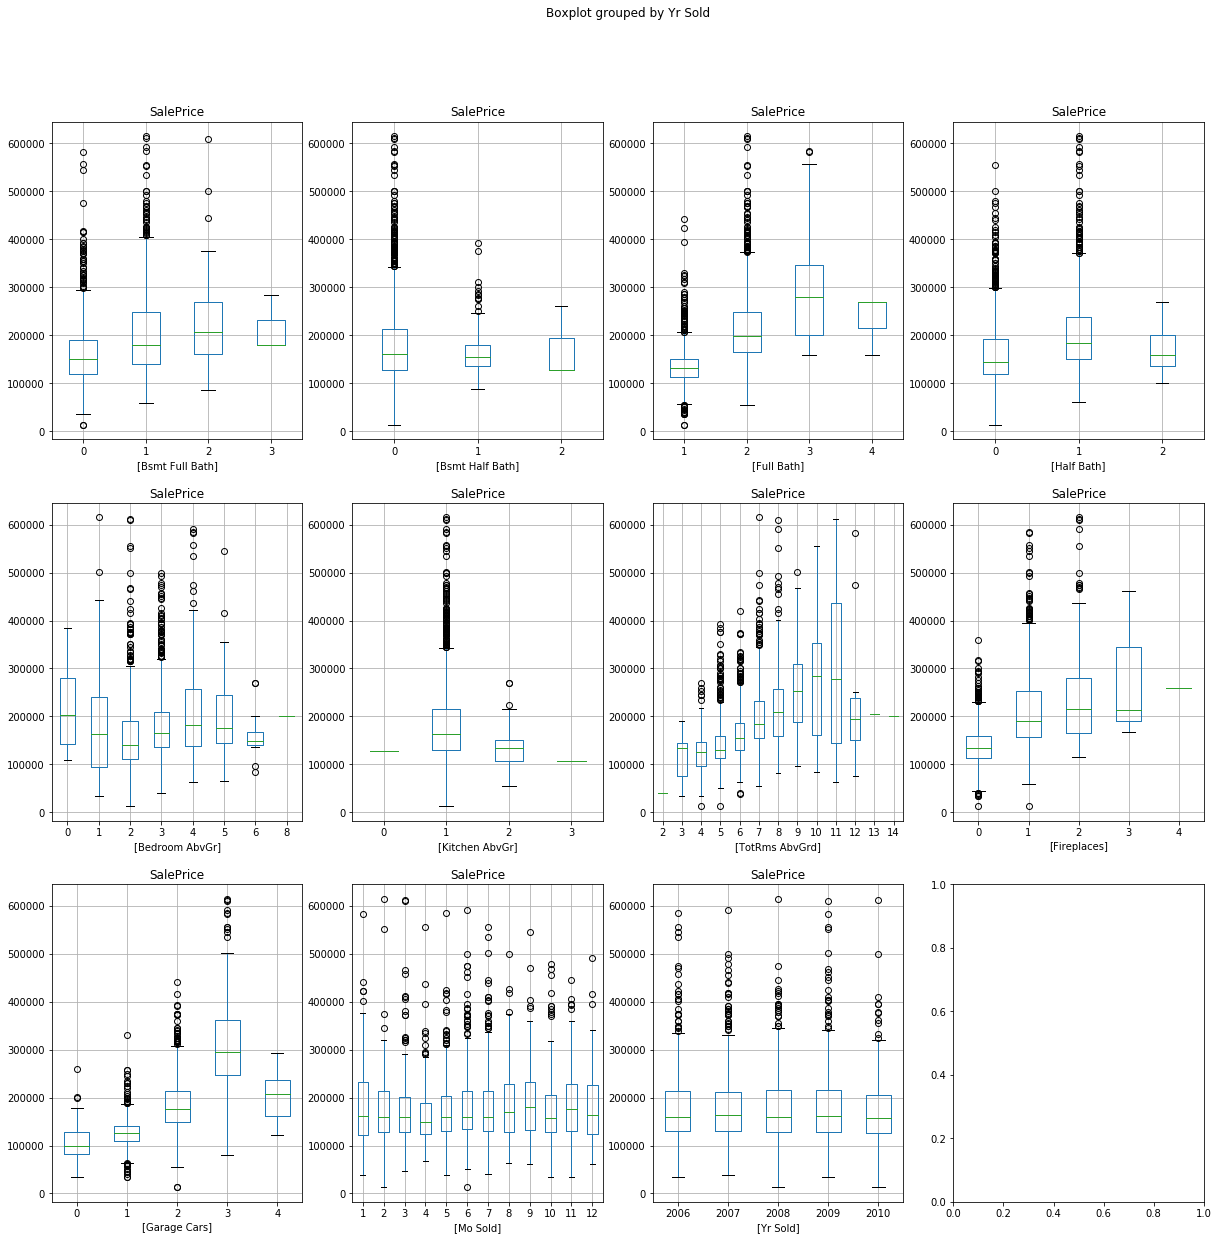

In [57]:
# discrete cols excluding years and order
discrete_cols2 = [
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
    'Garage Cars', 'Mo Sold', 'Yr Sold']

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,20))
for i, dc in enumerate(discrete_cols2):
    df_tr[[dc, 'SalePrice']].boxplot(by=dc, ax=axes[int(i/4), i%4])
plt.show()

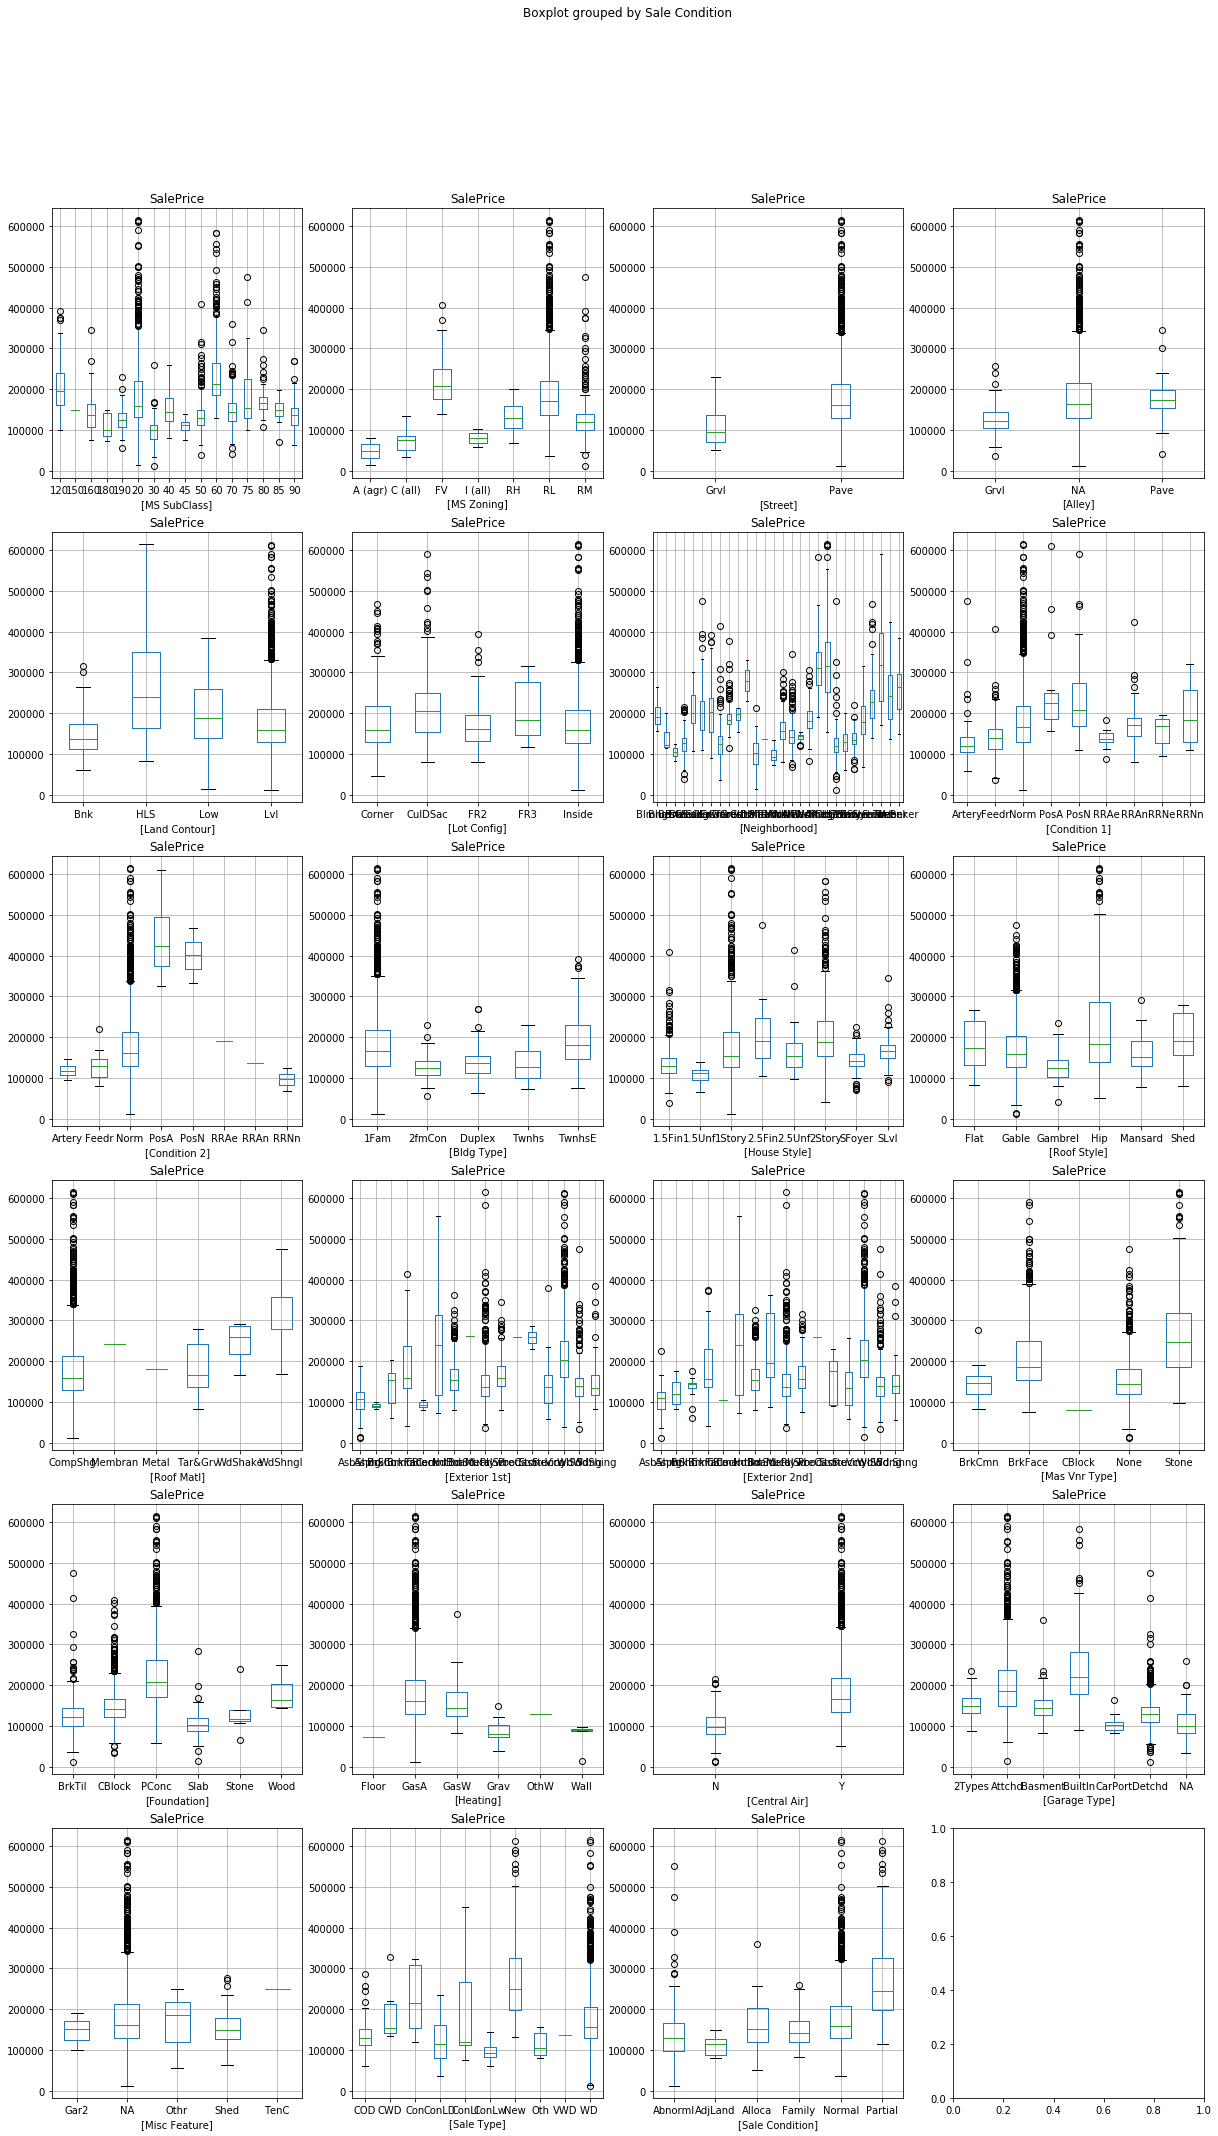

In [58]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,35))
for i, col in enumerate(nominal_cols[1:]):
    df_tr[[col, 'SalePrice']].boxplot(by=col, ax=axes[int(i/4), i%4])
plt.show()

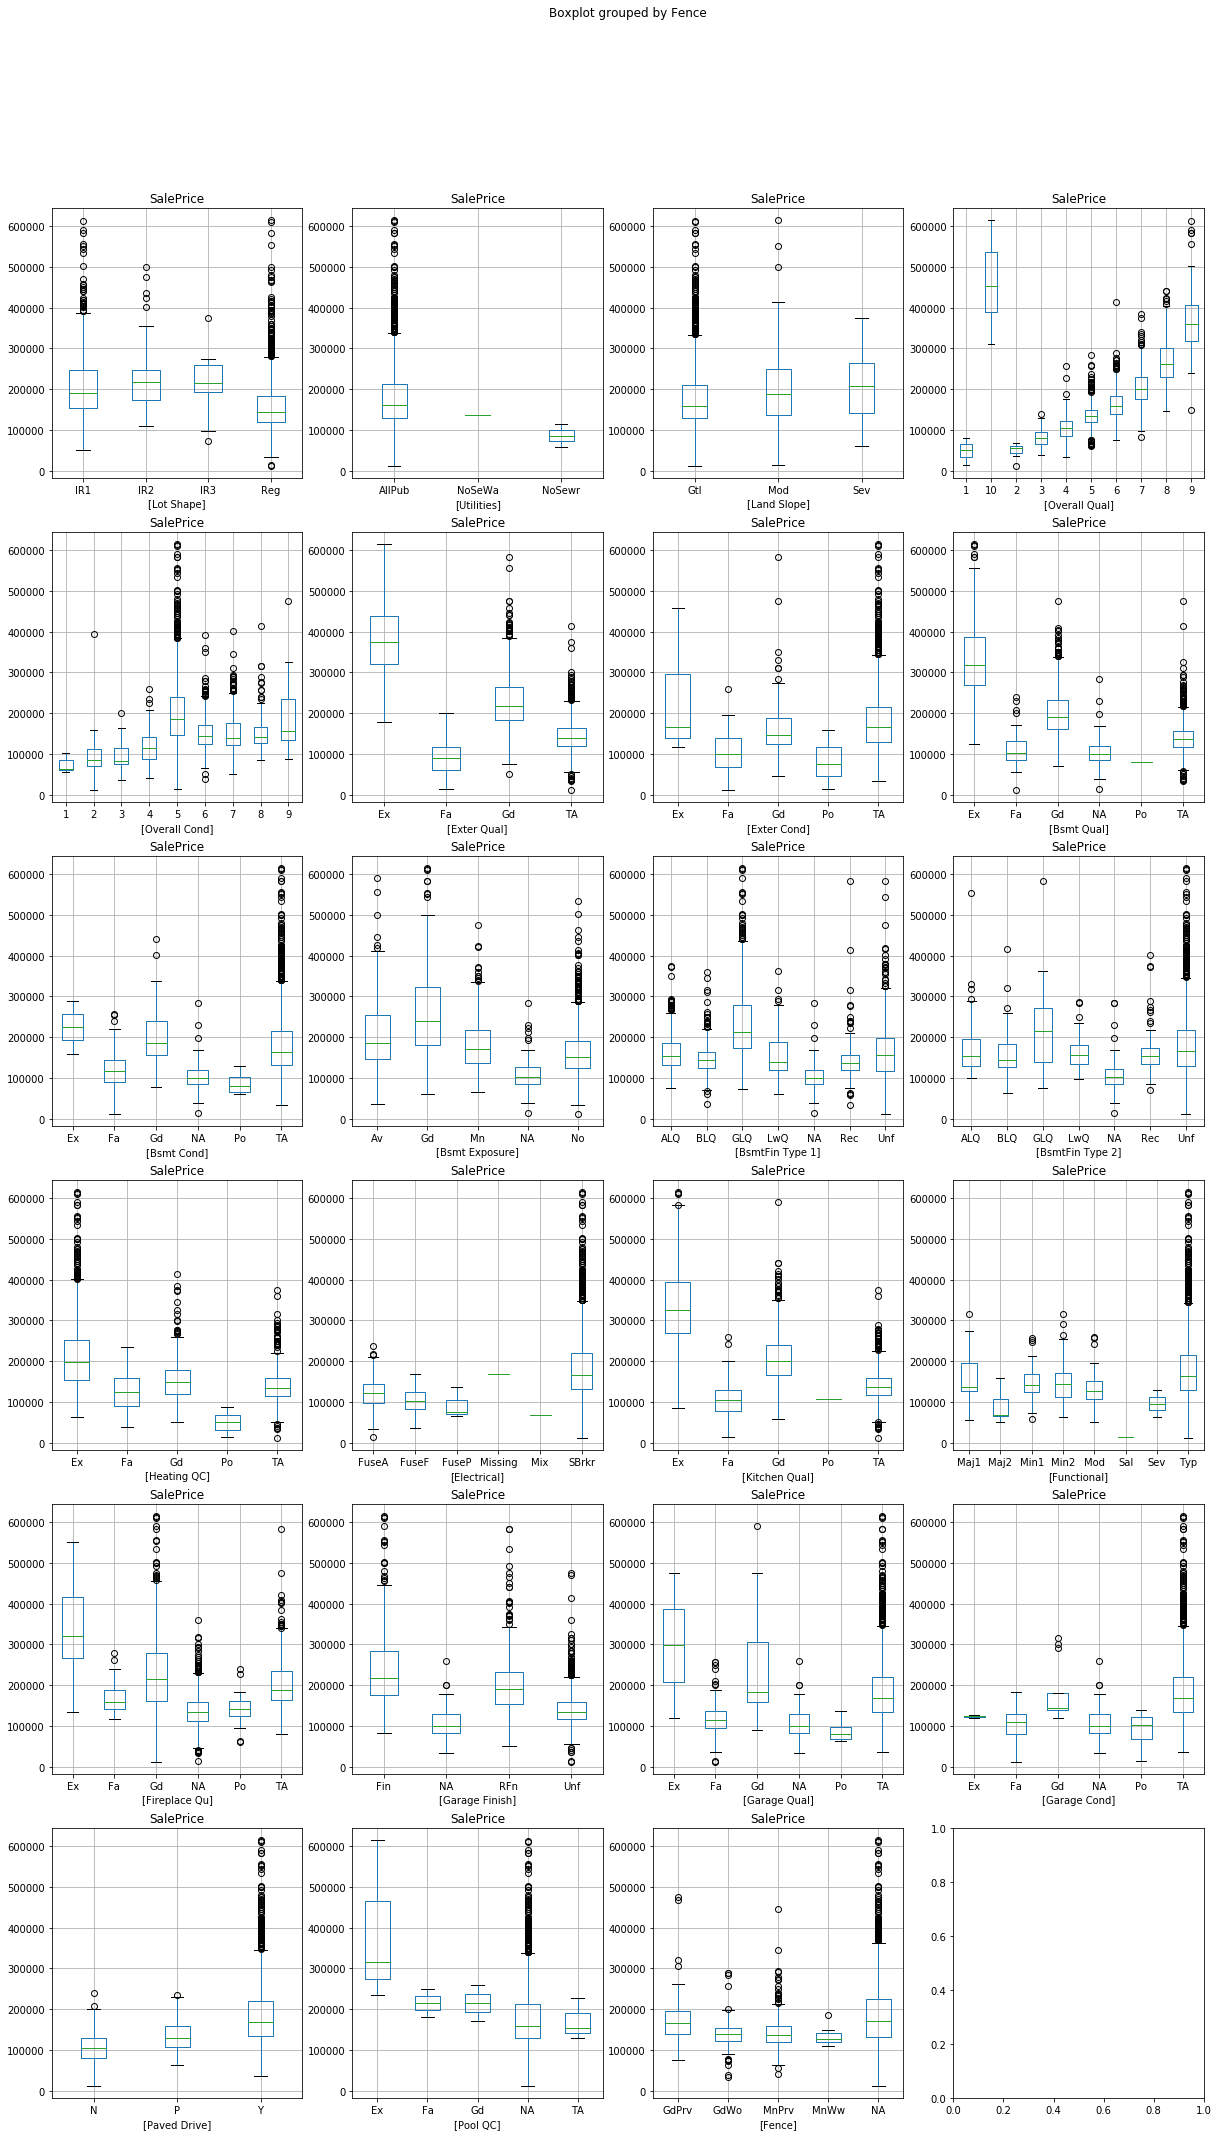

In [59]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,35))
for i, col in enumerate(ordinal_cols):
    df_tr[[col, 'SalePrice']].boxplot(by=col, ax=axes[int(i/4), i%4])
plt.show()

# Save clean data

In [60]:
# drop Order column and keep PID for reference 
df.drop(columns=['Order'], inplace=True)

In [61]:
df.to_csv('house-prices-clean.csv', index=False)